In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [7]:
train.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


In [4]:
test.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [5]:
train["SOURCE"].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       1
       ..
3083    0
3084    1
3085    0
3086    1
3087    0
Name: SOURCE, Length: 3088, dtype: int64>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOURCE', ylabel='count'>

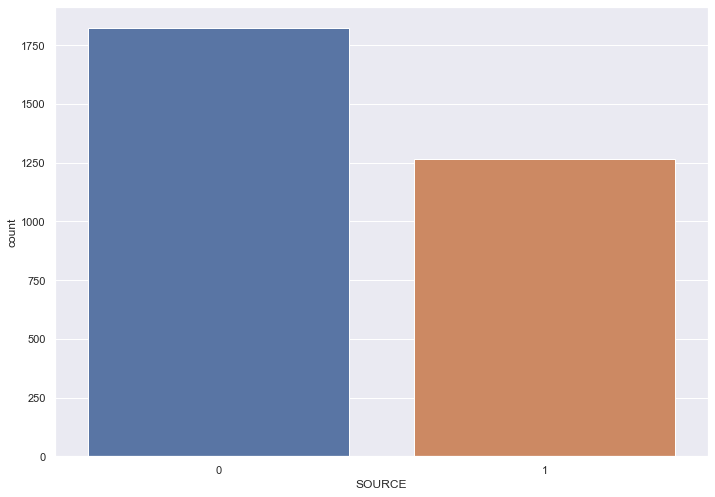

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["SOURCE"])

In [21]:
le = LabelEncoder()
le

LabelEncoder()

In [22]:
x = X
x.SEX = le.fit_transform(x.SEX)
x

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,1
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,1
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,0
...,...,...,...,...,...,...,...,...,...,...
3083,40.5,13.8,4.54,10.9,290,32.1,34.5,93.1,79,1
3084,28.8,10.5,3.49,20.6,735,32.3,37.1,87.2,43,0
3085,45.9,15.4,5.64,3.9,281,28.5,33.9,84.2,14,1
3086,32.6,10.2,5.36,4.4,303,20.0,31.8,62.9,3,1


In [23]:
X = train.iloc[:,1:11]
X
y = train["SOURCE"]

In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [50]:
lrcv = LogisticRegressionCV()
lrcv.fit(x,y)
lrcv

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegressionCV()

In [51]:
pred = lrcv.predict(X_train)

In [30]:
len(pred)

2068

In [52]:
pred2 = lrcv.predict(X_test)

In [53]:
train_metrics = metrics.f1_score(y_train, pred)
test_metrics = metrics.f1_score(y_test, pred2)

In [54]:
print("The f1 score for the train patient is ", train_metrics)
print("The f1 score for the test patient is ", test_metrics)

The f1 score for the train patient is  0.6070686070686071
The f1 score for the test patient is  0.6314363143631437


In [47]:
sample.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [48]:
submitfile = sample.copy()

In [61]:
submitfile.SOURCE = lrcv.predict(y)

ValueError: X has 1 features per sample; expecting 10

In [60]:
y = y.reshape(1,-1)

In [65]:
submitfile["SOURCE"].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1319    1
1320    1
1321    1
1322    1
1323    1
Name: SOURCE, Length: 1324, dtype: int64>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOURCE', ylabel='count'>

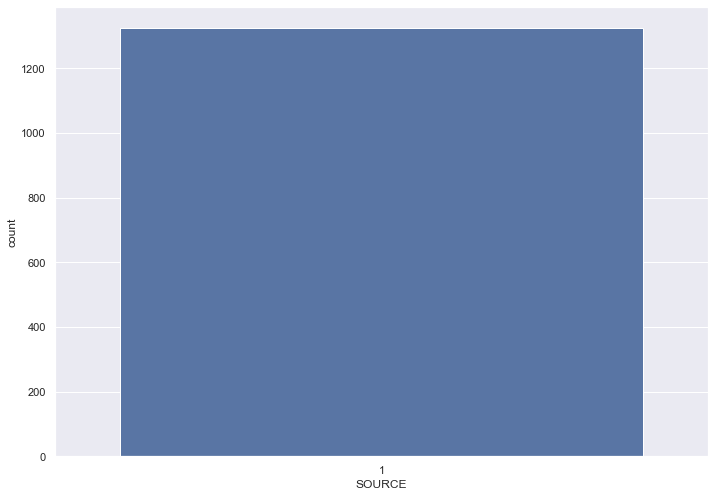

In [66]:
sns.countplot(submitfile["SOURCE"])

In [68]:
acc_score = metrics.accuracy_score(y_test, pred2)
acc_score

0.7333333333333333

In [69]:
submitfile.to_csv("kagglepredict.csv")